<a href="https://colab.research.google.com/github/sakarla/AI-in-the-Built-Environment/blob/main/week%204_5_Data%20Visualization/Notebook%20code/image_preprocessing_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image analysis and preprocessing**
In this section, we will implement several preprocessing techniques on the image data. Then we will learn feature extraction and save it in a CSV file. The objective is to familiarize you with essential steps that enhance data clarity, ensuring it is well-prepared for the machine learning process.

* Read URLs from JSON or CSV files and show an image
* Learn image preprocessing:
  *  Resizing
  * Grayscale conversion
  * Normalization
  * Flattening
*   Feature extracting from all images and saving into CSV file
*  Edge detection

Let's get started!

# **Read URLs from json or csv file and show image**

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [2]:
import json
import os

############################################################
# Specify the folder containing your JSON files
folder_path = '/content/drive/MyDrive/Colab Notebooks/image'
############################################################


# List all JSON files in the folder
json_files = [file for file in os.listdir(folder_path) if file.endswith('.json')]

combined_data = []

for file in json_files:
    with open(os.path.join(folder_path, file), 'r') as f:
        data = json.load(f)
        combined_data.extend(data)  # or use `.append(data)` for dictionary data

############################################################
# Save the combined data to a new JSON file
with open('/content/drive/MyDrive/Colab Notebooks/image/combined_data.json', 'w') as f:
    json.dump(combined_data, f, indent=4)
############################################################


To download images from a list of URLs provided in a CSV or JSON file and save them to a designated folder, you can follow this streamlined process:

**Step 1:** Import Libraries

Start by importing the necessary libraries:

In [3]:
import pandas as pd  #pandas is a powerful library used for data manipulation and analysis.
import requests  #requests is a library for making HTTP requests in Python.
import os  #os is a library that provides a way to interact with the operating system.
from PIL import Image  #PIL (Python Imaging Library) is a library for opening, manipulating, and saving images.


**Step 2:** Read the json File

Load the json file containing image URLs using Pandas. Replace "**content/drive/MyDrive/Colab Notebooks/image/combined_data.json**" with the actual path to your json file and specify the column containing the image URLs (e.g., "image_url").

In [5]:
import json
#############################################################################
# Load the JSON file
json_file_path = "/content/drive/MyDrive/Colab Notebooks/image/combined_data.json"
#############################################################################
# Initialize an empty list to store the image URLs
image_urls = []

# Read and parse the JSON file
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)

    # Assuming your JSON data is a list of dictionaries with an "image_url" field
    for item in data:
        if "image_url" in item:
            image_url = item["image_url"]
            image_urls.append(image_url)

# Now, image_urls contains the image URLs from the JSON data
# You can use this list as needed


In [6]:
image_urls

['https://www.facebook.com/tr?id=350870482443432&ev=PageView&noscript=1',
 'https://assets.adsttc.com/doodles/flat/logo-blue-full.svg',
 'https://assets.adsttc.com/doodles/flat/logo-blue-full.svg',
 'https://assets.adsttc.com/doodles/flat/logo-blue-full.svg',
 'https://assets.adsttc.com/doodles/flat/logo-animation.gif',
 'https://images.adsttc.com/media/images/65ae/e3f4/9936/3f1e/55ff/f330/newsletter/house-n0-use-studio_11.jpg?1705960502',
 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAUEBAAAACwAAAAAAQABAAACAkQBADs=',
 'https://images.adsttc.com/media/images/65ae/e3f3/e32f/dc2f/927b/735c/newsletter/house-n0-use-studio_21.jpg?1705960462',
 'https://images.adsttc.com/media/images/65

**Step 3:** Create a Folder to Save Images

Create a folder to save the downloaded images if it doesn't already exist. You can specify the folder name as you like.

In [7]:
output_folder = "downloaded_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


**Step 4:** Download and Save Images

Iterate through the image URLs, download each image, and save it to the folder you created in Step 3.

In [8]:
for i, url in enumerate(image_urls):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            image_content = response.content
            with open(os.path.join(output_folder, f"image_{i+1}.jpg"), "wb") as f:
                f.write(image_content)
            print(f"Image {i+1} downloaded and saved.")
        else:
            print(f"Failed to download image {i+1}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading image {i+1}: {str(e)}")


Image 1 downloaded and saved.
Image 2 downloaded and saved.
Image 3 downloaded and saved.
Image 4 downloaded and saved.
Image 5 downloaded and saved.
Image 6 downloaded and saved.
Error downloading image 7: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Error downloading image 8: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Error downloading image 9: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Error downloading image 10: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='
Error downloading image 11: No connection adapters were found for 'data:image/gif;base64,R0lGODlhAQABAIAAAAUEBAAAACwAAAAAAQABAAACAkQBADs='
Image 12 downloaded and saved.
Image 13 downloaded and saved.
Image 14 downloaded and saved.
Image 15 downloaded

This code will download the images one by one from the URLs in your JSON file and save them with names like "image_1.jpg," "image_2.jpg," and so on in the specified output folder.

**Step 5:** Optional - Display Images

If you want to display the downloaded images, you can use the PIL library:

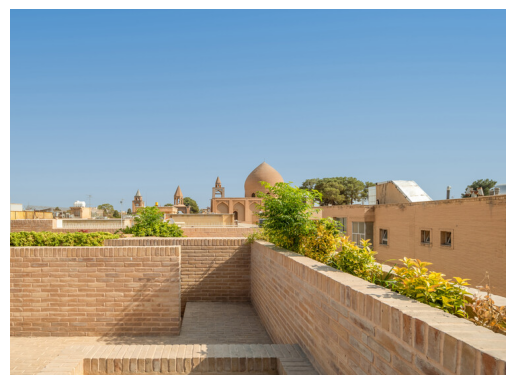

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

#####################################################################################
# Specify the file path
image_path = 'downloaded_images/image_219.jpg'
#####################################################################################
# Check if the file exists
if os.path.isfile(image_path):
    # Open and display the image using Matplotlib
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Image file not found at: {image_path}")


# **Image color processing**
This part will guide you through various image color processing techniques using Python. We will use the `cv2` library for image manipulation and `matplotlib` for displaying the images.

**Step 1:** Import Libraries and Load the Image

Start by importing the necessary libraries and loading the downloaded image:

In [10]:
import cv2
import matplotlib.pyplot as plt
########################################################
# Load the downloaded image
#change this line to the name of image you want
image_path = 'downloaded_images/image_219.jpg'
########################################################
image = cv2.imread(image_path)


**Step 2:** Display the Original Image

Display the original image using Matplotlib:

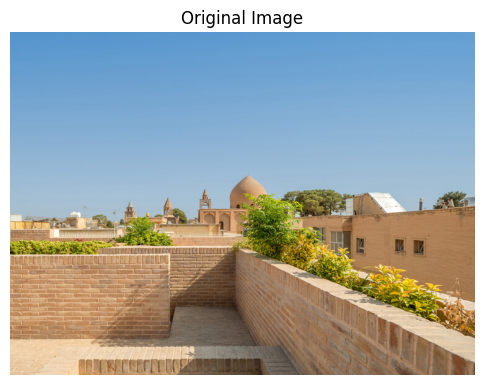

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Original Image')
plt.axis('off')
plt.show()


Now, you can perform various image manipulation tasks on this image.

**Step 3:** Change Color

Change the color of the image by applying a color transformation. For example, let's convert the image to grayscale:

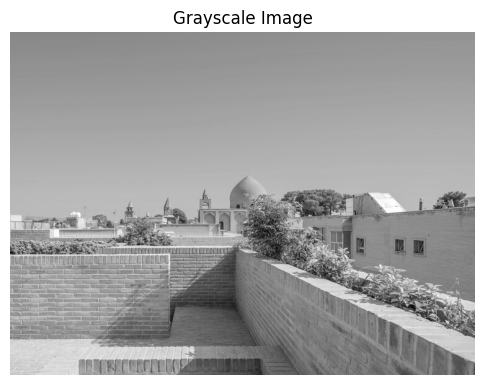

In [12]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


**Step 4:** Split Channels

You can split the image into its color channels (Red, Green, and Blue) and display each channel separately. Here's an example with the Blue channel:

In [ ]:
# Split the image into color channels
b, g, r = cv2.split(image)

# Create a 1x3 grid of subplots for displaying the channels
plt.figure(figsize=(18, 6))

# Display the Blue channel in the first subplot
plt.subplot(131)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel in the second subplot
plt.subplot(132)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel in the third subplot
plt.subplot(133)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.show()


**Step 5: Resize Image**

Resize the image to a specific size:

In [ ]:
image.shape

In [ ]:
# Resize the image to a new width and height
new_width = 200
new_height = 200
resized_image = cv2.resize(image, (new_width, new_height))

# Display the resized image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()


In [ ]:
resized_image.shape

**Step 6:** Apply Filters

You can apply various filters to the image, such as blurring or sharpening. Here's an example of blurring the image using Gaussian blur:

In [ ]:
# Apply Gaussian blur to the original image
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

# Create a Matplotlib figure to display the blurred image
plt.figure(figsize=(6, 6))

# Convert the color format from BGR to RGB for proper display
blurred_rgb_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the blurred RGB image
plt.imshow(blurred_rgb_image)

# Set a title for the displayed image
plt.title('Blurred Image')

# Turn off axis labels and ticks for a cleaner display
plt.axis('off')

# Show the image in the Matplotlib plot
plt.show()


# **Preprocessing on the entire dataset and Feature Extraction Using Pre-trained Model**
In this section, we will preprocess a set of images and extract features using a pre-trained model. Preprocessing involves several steps to ensure the images are in a consistent format, which is crucial for effective feature extraction. We will use the VGG16 model, pre-trained on the ImageNet dataset, to extract meaningful features from the images. These features can be used for various machine learning tasks such as classification, clustering, or image retrieval.

**Preprocessing Steps**

1. **Loading Images**: We will load the images from the specified directory.
2. **Resizing:** Each image will be resized to 224x224 pixels, the input size required by the VGG16 model.
3. **Color Conversion:** Images will be converted to RGB format to ensure consistency.
4.**Normalization:** Pixel values will be normalized to a range suitable for the model.
5. **Error Handling**: Any issues during the image loading and preprocessing will be handled gracefully, ensuring the process continues for the rest of the dataset.

**Feature Extraction**

1. **Using VGG16 Model:** We will use the VGG16 model, which has been pre-trained on the ImageNet dataset. This model is capable of extracting rich features from images due to its deep architecture and extensive training.
2. **Extracting Features:** The model will extract features from the images, which will then be flattened into a one-dimensional array.
3. **Saving Features:** The extracted features, along with the corresponding filenames, will be saved to a CSV file for further analysis.

**Step1:** Load and Preprocess Images

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

def load_and_preprocess_image(image_path, size=(224, 224)):
    try:
        # Load the image
        img = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
        # Resize the image
        img = img.resize(size)
        # Convert the image to an array
        img_array = img_to_array(img)
        # Expand dimensions to match the shape required by VGG16
        img_array = np.expand_dims(img_array, axis=0)
        # Preprocess the image for VGG16
        img_array = preprocess_input(img_array)
        return img_array
    except Exception as e:
        print(f"Cannot process image: {image_path}, Error: {e}")
        return None

def save_to_csv(data, filename):
    # Create DataFrame
    df = pd.DataFrame(data)
    # Save to CSV
    df.to_csv(filename, index=False)

#########################################################
# Directory where your images are stored
image_dir = 'downloaded_images'

#########################################################
image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]


**Step 2:** Feature Extraction Using Pre-trained Model

In [ ]:
# Load the VGG16 model pre-trained on ImageNet
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(image_paths, model):
    features = []
    for path in image_paths:
        img_array = load_and_preprocess_image(path)
        if img_array is not None:
            try:
                # Extract features using VGG16
                feature = model.predict(img_array)
                # Flatten the feature map
                feature = feature.flatten()
                features.append({'FileName': os.path.basename(path), 'Features': feature.tolist()})
            except Exception as e:
                print(f"Error extracting features from image: {path}, Error: {e}")
    return features

# Extract features for all images
image_features = extract_features(image_paths, vgg16_model)

#########################################################
# Save the features to CSV
save_to_csv(image_features, 'image_features_vgg16.csv')

#########################################################

# **Edge Detection**

Edge detection is a technique used in image processing and computer vision to identify the boundaries or edges within an image. These edges represent significant changes in intensity or color and often correspond to the boundaries of objects within the image. Detecting these edges is crucial for understanding the structure of objects and scenes in the image.

To perform edge detection on an image in Python, you can use the popular library OpenCV. Here are the steps to perform edge detection on the image you downloaded:

**Step 1:** Import Libraries

Start by importing the necessary libraries:

In [ ]:
import cv2
import matplotlib.pyplot as plt


Make sure you have OpenCV installed in your Colab environment. You can install it using `!pip install opencv-python` if it's not already installed.

**Step 2:** Load the Image

Load the downloaded image using OpenCV:

In [ ]:

########################################################
#Choose your image and change the name
image_path = 'downloaded_images/image_219.jpg'
########################################################
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


The `cv2.IMREAD_GRAYSCALE `flag loads the image in grayscale mode, which simplifies edge detection.

**Step 3:** Perform Edge Detection

The Canny edge detection algorithm is a multi-step process. It is widely used in computer vision and image processing due to its ability to detect a wide range of edges in images. The algorithm is designed to be robust to noise and to find the most significant edges in an image.

Perform edge detection on the loaded image using the Canny edge detection algorithm:

In [ ]:
edges = cv2.Canny(image, threshold1=30, threshold2=100)


You can adjust the threshold1 and threshold2 parameters to control the sensitivity of edge detection. These values determine the lower and upper thresholds for edge detection.

**Step 4:** Display the Original Image and Edge Image

Display both the original image and the edge-detected image using Matplotlib:

In [ ]:
# Display the original image
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the edge-detected image
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.show()


# **Save Feature extracted from edge detection in csv file**

This part will guide you through extracting features from edge-detected images and saving these features in a CSV file using Python.

In [ ]:
import cv2
import csv
import numpy as np

def extract_features(image_path):
    # Check if the image file exists
    if not os.path.exists(image_path):
        return None, "File not found"

    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        return None, "Image not loaded"
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize image if necessary
    resized_image = cv2.resize(gray_image, (width, height))  # Define width and height
    # Perform edge detection
    edges = cv2.Canny(resized_image, threshold1=30, threshold2=100)
    # Flatten the edge image to create a feature vector
    feature_vector = edges.flatten()
    return feature_vector


width=28
height=28
# List of image file paths
image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]
# List to hold all feature vectors
feature_vectors = []

# Open the CSV file for writing
with open('feature_vectors_edge.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['image_name', 'features'])

    # Extract features for each image and write to the CSV file
    for path in image_paths:
        features = extract_features(path)
        # Write the image name and feature string to the CSV
        writer.writerow([path, features])

# **Save just preprocessing**

You can do some preprocessing steps for all images and save in csv file. because it good to do not repeat every time.

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd

def load_and_preprocess_image(image_path, size=(64, 64)):
    try:
        # Load the image
        img = Image.open(image_path)
        # Resize and convert to grayscale
        img = img.resize(size).convert('L')
        # Normalize and flatten
        image_data = np.array(img).flatten() / 255.0
        # Get file name
        file_name = os.path.basename(image_path)
        return file_name, image_data
    except IOError:
        print(f"Cannot process image: {image_path}")
        return None

def save_to_csv(data, filename):
    # Remove None values
    data = [d for d in data if d is not None]
    # Create DataFrame
    df = pd.DataFrame(data, columns=['FileName', 'ImageData'])
    # Save to CSV
    df.to_csv(filename, index=False)
#########################################################################
# Directory where your images are stored
image_dir = '/content/drive/MyDrive/Colab Notebooks/downloaded_images'
#########################################################################

image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Process each image and store in a list
processed_images = [load_and_preprocess_image(path) for path in image_paths]

# Save to CSV
save_to_csv(processed_images, 'preprocessed_images.csv')
